# 2022 NZMSA Data Science Submission.

# Max Couling



In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
#from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline


# Exploratory Data Analysis.

## Reminder of what each variable means:
`station`: Acronym for the place of data capture.
`valid`: Date and time of capture.
`tmpc`: Temperature of the environment in celsius.
`dwpc`: Temperature of the dew point in the environment in celsius.
`relh`: Relative humidity of the environment in percentage.
`sknt`: Wind Speed in knots.
`gust`: Wind Gust in knots.
`peak_wind_drct`: Peak Wind Gust Direction (from PK WND METAR remark). (deg).

In [4]:
dataset = pd.read_csv("weather-data.csv")
dataset.head()

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


Checking if the collums are the right datatypes by using the "dtypes" function

In [5]:
dataset.dtypes

 station           object
valid              object
tmpc              float64
dwpc              float64
relh              float64
sknt              float64
gust              float64
peak_wind_drct    float64
dtype: object

As `valid` is our date, I will add a row named  `date` and give it the datatype of datetime and drop `valid`. I will show the top five rows below and the dtypes to make sure that it worked.

In [6]:
dataset['Date'] = pd.to_datetime(dataset['valid'])
dataset = dataset.drop('valid', axis=1)
dataset.head()

,station,tmpc,dwpc,relh,sknt,gust,peak_wind_drct,Date
0,NZAA,21.0,11.0,52.77,15.0,NaN,NaN,2015-01-01 00:00:00
1,NZAA,21.0,10.0,49.37,16.0,NaN,NaN,2015-01-01 00:30:00
2,NZAA,21.0,12.0,56.38,16.0,NaN,NaN,2015-01-01 01:00:00
3,NZAA,21.0,13.0,60.21,16.0,NaN,NaN,2015-01-01 01:30:00
4,NZAA,21.0,12.0,56.38,16.0,NaN,NaN,2015-01-01 02:00:00


In [7]:
dataset.dtypes

 station                  object
tmpc                     float64
dwpc                     float64
relh                     float64
sknt                     float64
gust                     float64
peak_wind_drct           float64
Date              datetime64[ns]
dtype: object

With the df.info() I am making sure that the data values are non-null in our dataset


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0    station        103713 non-null  object        
 1   tmpc            103678 non-null  float64       
 2   dwpc            103678 non-null  float64       
 3   relh            103593 non-null  float64       
 4   sknt            103704 non-null  float64       
 5   gust            1203 non-null    float64       
 6   peak_wind_drct  0 non-null       float64       
 7   Date            103713 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.3+ MB


with a result of 103713 total values, and the `tmpc`, `dwpc` having 10368, `relh` having 103593 and `sknt` having 103704, there is ~100-200 NaN values between them all. `gust` only has 1000 values that are a number and `peak_wind_drct` has none. So those last two collums will be removed and the values that have a NaN row will be removed as well.

In [9]:
dataset = dataset.drop('peak_wind_drct', axis=1)
dataset = dataset.drop('gust', axis=1)

In [10]:
dataset.dropna(inplace = True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0    station  103584 non-null  object        
 1   tmpc      103584 non-null  float64       
 2   dwpc      103584 non-null  float64       
 3   relh      103584 non-null  float64       
 4   sknt      103584 non-null  float64       
 5   Date      103584 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 5.5+ MB


I noticed in the .head() above that the `station` seemed to be the same with the first five values, to check if the station changed I ran the code below.

In [12]:
len(dataset[' station'].unique())

1

So because there is only one station, I figured I could drop it from the dataset.

In [13]:
dataset = dataset.drop(' station', axis=1)
dataset.head()

,tmpc,dwpc,relh,sknt,Date
0,21.0,11.0,52.77,15.0,2015-01-01 00:00:00
1,21.0,10.0,49.37,16.0,2015-01-01 00:30:00
2,21.0,12.0,56.38,16.0,2015-01-01 01:00:00
3,21.0,13.0,60.21,16.0,2015-01-01 01:30:00
4,21.0,12.0,56.38,16.0,2015-01-01 02:00:00


In [14]:
dataset.describe()
#mean is the average
#std is the standard deviation
#25% is what 25% of the data is lower than and 75% is what the top 25% is higher than
#50% is the median
#min and max are the minimum and maximum values found in the dataset

,tmpc,dwpc,relh,sknt
count,103584.000000,103584.000000,103584.000000,103584.000000
mean,15.807721,12.110162,79.780982,8.919428
std,4.233248,3.732730,12.561259,5.348646
min,2.000000,-2.000000,29.230000,0.000000
25%,13.000000,9.000000,71.450000,5.000000
50%,16.000000,12.000000,81.990000,8.000000
75%,19.000000,15.000000,88.180000,12.000000
max,29.000000,23.000000,100.000000,42.000000


## Correlation

Checking if the data correlates, first by the table below then I visualised it with a heatmap, closer to purple/ cooler colours the more correlation the variables have to each other


In [15]:
dataset.corr()

,tmpc,dwpc,relh,sknt
tmpc,1.000000,0.795169,-0.451305,0.235513
dwpc,0.795169,1.000000,0.178039,-0.006994
relh,-0.451305,0.178039,1.000000,-0.414763
sknt,0.235513,-0.006994,-0.414763,1.000000


<AxesSubplot:>

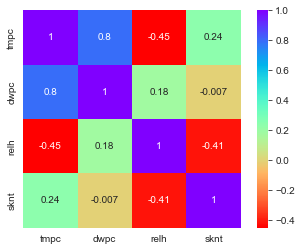

In [16]:
sns.heatmap(dataset.corr(), annot=True, square=True,cmap="rainbow_r")

## Correlation analysis
With the correlation above, when the numbers are closer to 1 or -1, that means they have a pattern

I noticed that `tpmc` and `dwpc` have a pattern as their value is 0.8
other patterns I noticed is a weak correlation between `relh` and `tmpc` with a value of -0.45, `relh` and `sknt` with -0.41

<AxesSubplot:xlabel='tmpc', ylabel='dwpc'>

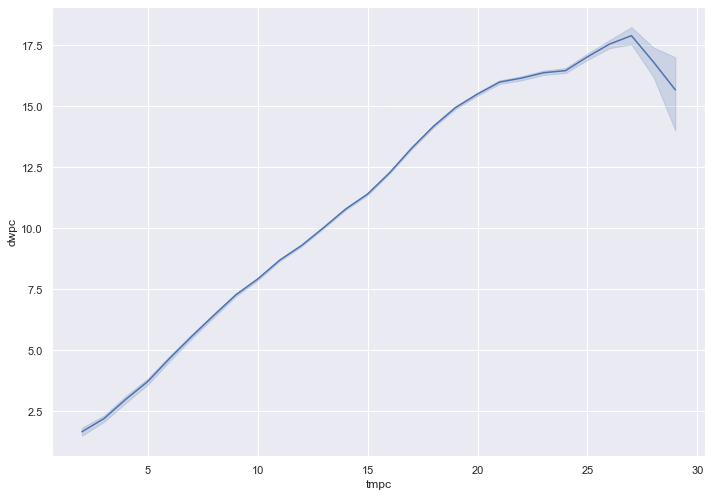

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#Relationship between temperature and temperature of dew point
sns.lineplot(x="tmpc", y="dwpc", data=dataset)

<AxesSubplot:xlabel='relh', ylabel='tmpc'>

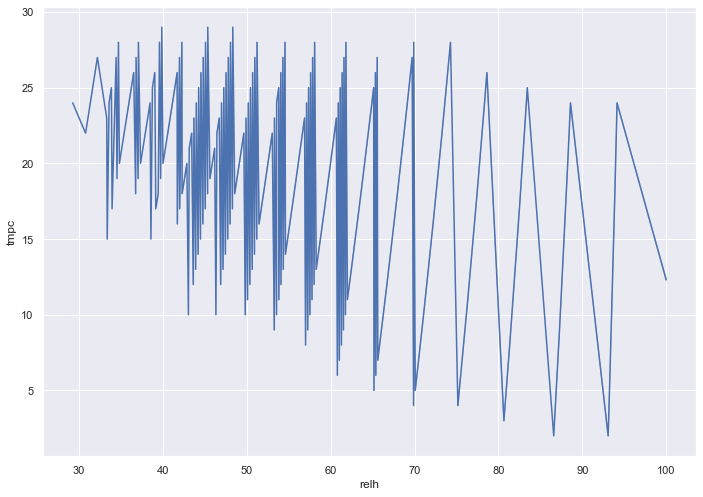

In [18]:
sns.lineplot(x="relh", y="tmpc", data=dataset)

<AxesSubplot:xlabel='relh', ylabel='sknt'>

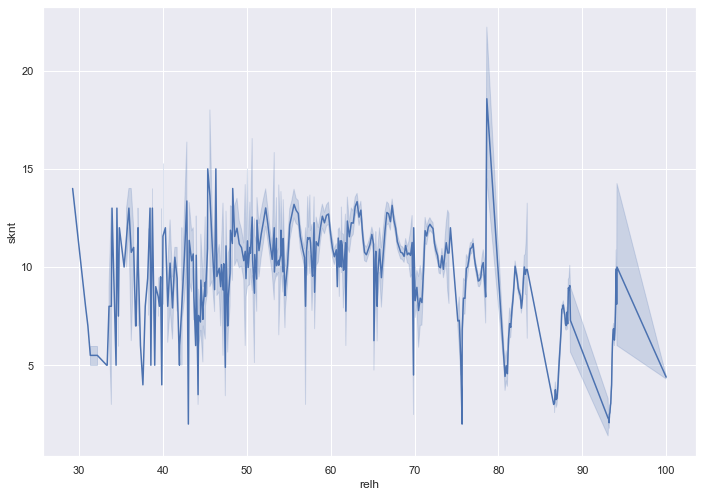

In [19]:
sns.lineplot(x="relh", y="sknt", data=dataset)

## Relationship between variables and time

<AxesSubplot:xlabel='Date', ylabel='tmpc'>

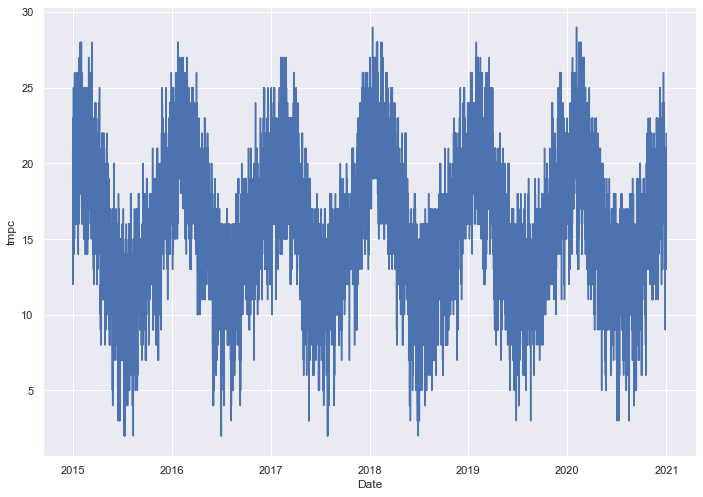

In [20]:
#relationship between date and tmpc

sns.lineplot(x="Date", y="tmpc",data=dataset, estimator=np.median)

<AxesSubplot:xlabel='Date', ylabel='dwpc'>

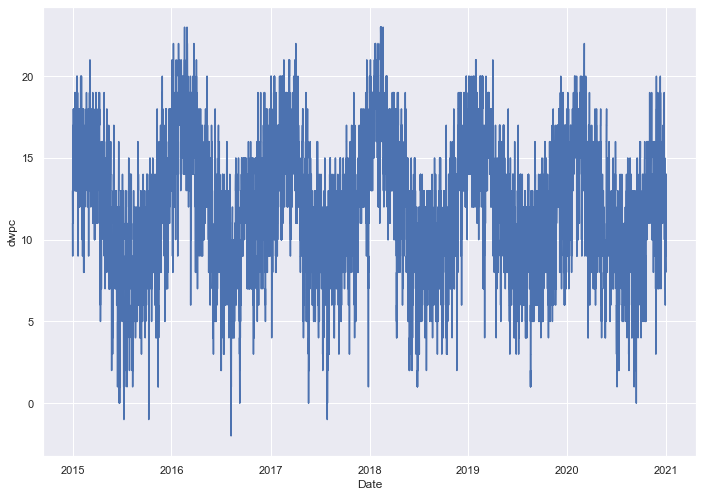

In [21]:
#relationship between date and dwpc
sns.lineplot(x="Date", y="dwpc",data=dataset, estimator=np.median)

<AxesSubplot:xlabel='Date', ylabel='relh'>

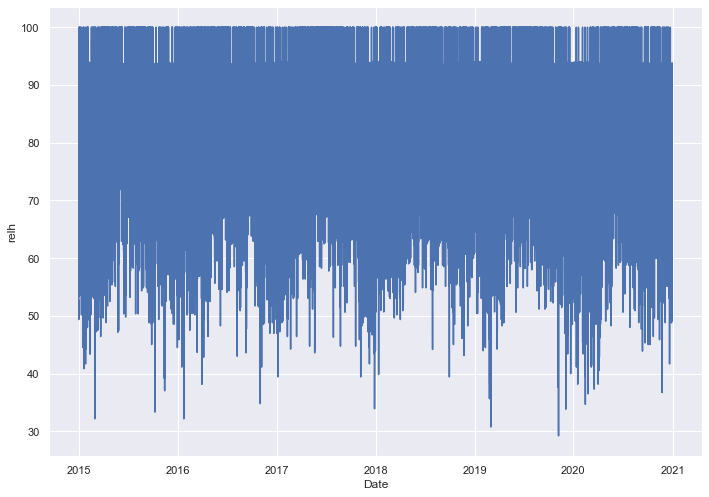

In [22]:
#relationship between date and relh
sns.lineplot(x="Date", y="relh",data=dataset, estimator=np.median)

<AxesSubplot:xlabel='Date', ylabel='sknt'>

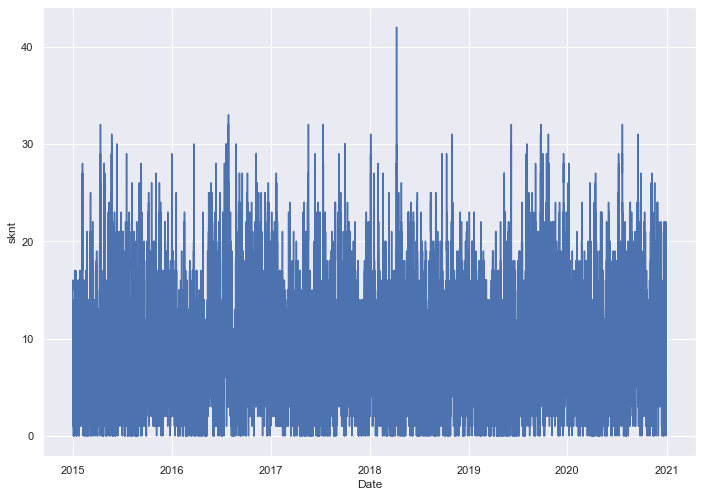

In [23]:
#relationship between date and sknt
sns.lineplot(x="Date", y="sknt",data=dataset, estimator=np.median)

## Conclusion of EDA

With the analysis I did above, it makes sense that the temperature (`tmpc`) and the temperature of the dew point (`dwpc`) in the environment in celsius as when it is hotter, the dew point in the environment should also be hotter.

Over time, `tmpc` and `dwpc` have a clear pattern where at the start and end of the year, their values are higher while in the middle of the year the value is lower. Contrastingly `sknt` and `relh` have no clear patterns when compared to time.

There was also no big gaps in the data that I could observe, that should have been shown by gaps in the graphs above

In conclusion, I believe that it makes the most sense to graph the temperature and date, because they correlate and there's a clear pattern and also because when looking at a weather forecast you generally want the temperature.

# Data Preparation

Because we are now only interested in `Date` and `tmpc`, i will make another dataframe which only has those two values.

In [24]:
data = dataset[['Date', 'tmpc']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']

C:\Users\maxco\AppData\Local\Temp\ipykernel_3364\1119096776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [25]:
data.head()

,ds,y
0,2015-01-01 00:00:00,21.0
1,2015-01-01 00:30:00,21.0
2,2015-01-01 01:00:00,21.0
3,2015-01-01 01:30:00,21.0
4,2015-01-01 02:00:00,21.0


There is alot of data from the head above that is exactly the same. to counteract this I will only be using the `tmpc` from once a day, i use this in the m.fit by having the freq being `D` which means it picks out one value a day to make train the model. I have used randomforestregressor model, gradientboostingregressor model, Ridge, Lasso and ElasticNet with Sklearn. However, I found that those didn't suit the data as well as NeuralProphet, they took longer to train and the results were the same or worse. The model I will be using is NeuralProphet.

# Data Modelling

In [27]:
data_train, data_test = train_test_split(data, test_size=0.2)

In [30]:
from neuralprophet import NeuralProphet

In [31]:
m = NeuralProphet()
m.fit(data_train, freq='D')


INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 79.559% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency 30T
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 60


  0%|          | 0/172 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.85E-02, min: 1.83E+00


  0%|          | 0/172 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.85E-02, min: 1.44E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.51E-02
Epoch[60/60]: 100%|██████████| 60/60 [03:06<00:00,  3.10s/it, SmoothL1Loss=0.0049, MAE=1.62, RMSE=2.07, RegLoss=0] 


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.465358,16.258201,20.346356,0.0
1,0.006527,1.889983,2.378791,0.0
2,0.005220,1.679245,2.135843,0.0
3,0.005386,1.710457,2.169279,0.0
4,0.005744,1.769421,2.240268,0.0
5,0.006209,1.838913,2.328286,0.0
6,0.006750,1.920699,2.427022,0.0
7,0.007412,2.018110,2.541682,0.0
8,0.008007,2.096446,2.640199,0.0
9,0.008753,2.198373,2.759248,0.0


In [46]:
m.test(data_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 20.186% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.005  1.625  2.059


,SmoothL1Loss,MAE,RMSE
0,0.004865,1.624511,2.059045


## Data Explanation
After we have trained our model, the MAE is 1.62, which means for a date predicted by the model, we should expect the range of error to be +/- 1.62 degrees. Which isn't too bad for an ML model. I will re-train the model with all the data available so that it is more accurate, and I will make a future dataframe that is a month into the future and try to predict the temperature of that date.

In [45]:
m = NeuralProphet()
m.fit(data, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.379% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency 30T
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 57


  0%|          | 0/175 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.00E-02, min: 1.96E+00


  0%|          | 0/175 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.00E-02, min: 2.21E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.88E-02
Epoch[57/57]: 100%|██████████| 57/57 [02:04<00:00,  2.19s/it, SmoothL1Loss=0.00489, MAE=1.62, RMSE=2.07, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.665267,22.403582,26.662663,0.0
1,0.051800,5.499251,6.598981,0.0
2,0.010691,2.386793,3.008546,0.0
3,0.005592,1.747374,2.215262,0.0
4,0.005431,1.719766,2.183560,0.0
5,0.005667,1.757190,2.230555,0.0
6,0.006008,1.810385,2.295972,0.0
7,0.006313,1.855859,2.352882,0.0
8,0.006743,1.921827,2.431722,0.0
9,0.007170,1.979533,2.506392,0.0


In [49]:
#getting future forecasts
future = m.make_future_dataframe(data, periods=31)

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.379% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency 30T


In [50]:
forecast = m.predict(future)
forecast = forecast.drop(['residual1', 'trend', 'season_yearly', 'season_weekly', 'season_daily'], axis=1)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - C:\Users\maxco\anaconda3\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



,ds,y,yhat1
0,2020-12-31 23:30:00,None,21.588593
1,2021-01-01 23:30:00,None,21.676987
2,2021-01-02 23:30:00,None,21.910826
3,2021-01-03 23:30:00,None,21.930223
4,2021-01-04 23:30:00,None,21.906168


Above `yhat1` is the predicted temperature for the new dates for 2021 that didn't exist in the database beforehand. You can see that it is around ~20 degrees which makes sense because it is in the summer. Below is a list of all the dates for the next month as I put in the period as 31, you can see what the end of the month's predicted temperature is going to be. Also, I nade a graph that roughly shows the temperature per day over January 2021. Ignore `y` that is the actual y, you would see values there if I showed before 2021

In [51]:
forecast.tail()

,ds,y,yhat1
26,2021-01-26 23:30:00,None,23.073362
27,2021-01-27 23:30:00,None,23.190998
28,2021-01-28 23:30:00,None,23.223269
29,2021-01-29 23:30:00,None,23.288506
30,2021-01-30 23:30:00,None,23.494091


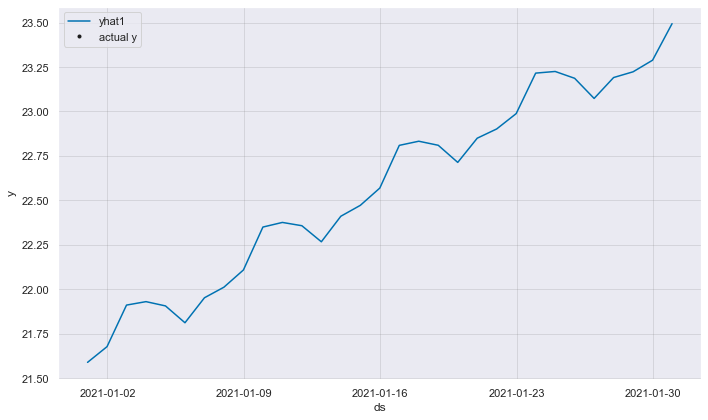

In [52]:
plot1 = m.plot(forecast)

However over a couple of years you can see my model do  with the information that it had from the weather data, with it being warmer over the summer months and colder over the winter:

In [55]:
forecast2 = m.predict(m.make_future_dataframe(data, periods=1200))
forecast2.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.379% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency 30T
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - C:\Users\maxco\anaconda3\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
1195,2024-04-09 23:30:00,None,20.835714,NaN,17.408875,1.396583,-0.133569,2.163824
1196,2024-04-10 23:30:00,None,20.829634,NaN,17.410004,1.311790,-0.055984,2.163824
1197,2024-04-11 23:30:00,None,20.741440,NaN,17.411133,1.226898,-0.060416,2.163824
1198,2024-04-12 23:30:00,None,20.689682,NaN,17.412266,1.141978,-0.028384,2.163824
1199,2024-04-13 23:30:00,None,20.781918,NaN,17.413393,1.057099,0.147602,2.163824


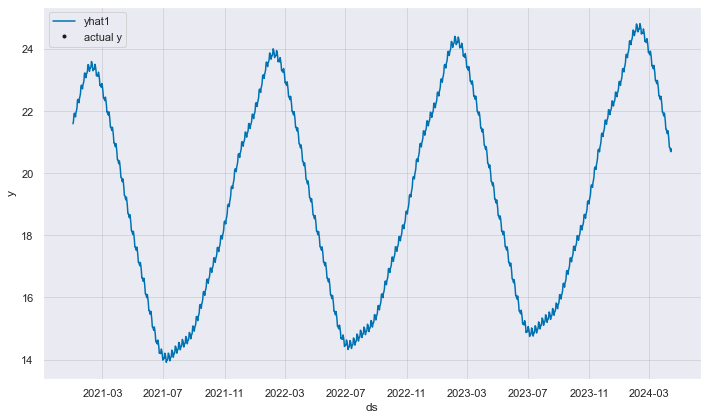

In [56]:
plot2 = m.plot(forecast2)

Over many years you can see that in the winter gets warmer and warmer, maybe my model is trying to indicate climate change. Will need more accurate models and sophisticated code to make sure though.

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.379% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency 30T
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - C:\Users\maxco\anaconda3\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



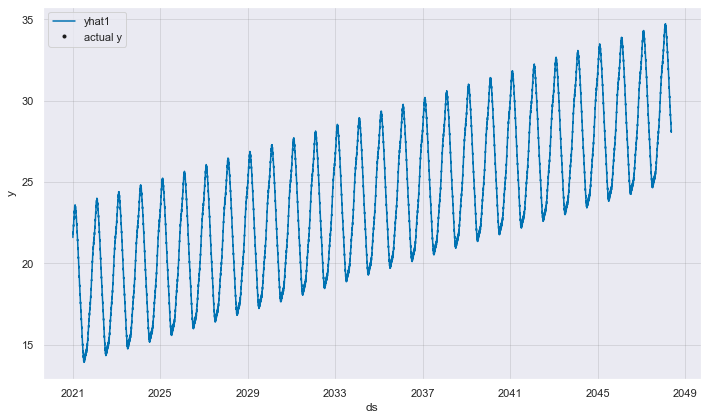

In [57]:
forecast3 = m.predict(m.make_future_dataframe(data, periods=10000))
forecast3.tail()
plot3 = m.plot(forecast3)

# Conclusion

* I believe that my model did well at predicted the temperature at a given day, as from my analysis it is colder through the winter months and warmer during the summer. I also found that over a bigger timeframe that it trends upwards that might correlate to climate change. My model has MAE of 1.62 which means that the temperature of any given day might be off by +/- 1.62 degrees, which is pretty good considering that my weather app on my phone is usually of by that as well.

* While data cleaning I found that some of the `tmpc` values were NaN which really messed up my first data models, I fixed it by removing it, but I was stumped on that. For next time I would make sure I removed all NaN values before doing any data analysis on it.

* I was successful of seeing what the temperature might be after the final data entry a month later. From my analysis it should have been 23.5 degrees.